<a href="https://colab.research.google.com/github/Todah01/AICommend_Project/blob/main/AI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = sigmoid(a3)

    return y

In [ ]:
network = init_network()
x = np.array([-3.0,-10.0])
forward(network,x)

array([0.56585985, 0.64170113])

## 출력층

In [ ]:
# softmax
import numpy as np
a = np.array([0.3,2.9,4.0])
def softmax(x):
    C = np.max(x)
    return np.exp(x-C)/np.sum(np.exp(x-C))
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
# softmax error
a = np.array([1010,1000,990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 출력층을 Softmax로 변경한 인공신경망

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)

    return y

network = init_network()
x = np.array([13.0,-100])
forward(network,x)

array([0.42190388, 0.57809612])

## MNIST dataset

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data() #x는 입력값에 사용 y는 정답
x_train=x_train/255.
x_test=x_test/255. # 픽셀이 0부터 255까지의 값을 가지고 있어서 -> 0~1사이의 값을 갖도록 표준화
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape) # 이번실습에서 사용
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


4


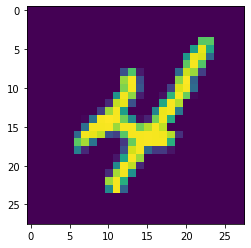

In [ ]:
import matplotlib.pyplot as plt
idx=9
img = x_train[idx] # 0번째 데이터의 사진
label = y_train[idx] # 0번째 데이터의 실제 정답
img = img.reshape(28,28)
plt.imshow(img)
print(label)

## MNIST 처리 신경망 구성

In [ ]:
from keras.datasets import mnist

def get_data():
    (x_train,y_train),(x_test,y_test)=mnist.load_data() #x는 입력값에 사용 y는 정답
    x_train=x_train/255.
    x_test=x_test/255. # 픽셀이 0부터 255까지의 값을 가지고 있어서 -> 0~1사이의 값을 갖도록 표준화
    x_train=x_train.reshape(60000,784)
    x_test=x_test.reshape(10000,784)
    return x_train, y_train

def init_network():
    network={}
    network['W1'] = np.random.normal(size=(784,50))
    network['B1'] = np.random.normal(size=(50,))
    network['W2'] = np.random.normal(size=(50,100))
    network['B2'] = np.random.normal(size=(100,))
    network['W3'] = np.random.normal(size=(100,10))
    network['B3'] = np.random.normal(size=(10,))
    return network

def predict(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['B1'], network['B2'], network['B3']

    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    return y


In [ ]:
network = init_network()
x_train,y_train=get_data()

In [ ]:
pred=predict(network, x_train[5])
np.argmax(pred)

2

## 예측의 정확도 측정

In [ ]:
accuracy_cnt = 0
for i in range(len(x_train)):
    pred = predict(network, x_train[i])
    p = np.argmax(pred)
    if p == y_train[i]:
        accuracy_cnt += 1

float(accuracy_cnt)/len(x_train)

0.06583333333333333

In [ ]:
a = np.array(([1,3,6],[2,1,4]))
np.argmax(a,axis=0)

array([1, 0, 0])

In [ ]:
a = np.array([1,3,4])
b = np.array([1,0,4])
np.sum(a == b)

2

## 배치처리

In [ ]:
accuracy_cnt = 0
batch_size = 100
for i in range(0,len(x_train),batch_size):
    x_batch = x_train[i:i+batch_size]
    pred = predict(network,x_batch)
    p = np.argmax(pred,axis=1)
    accuracy_cnt += np.sum(p==y_train[i:i+batch_size])

float(accuracy_cnt)/len(x_train)


0.06583333333333333

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataSet/master/iris.csv')
data=np.array(df)
x=data[:,:4]
y=data[:,4].astype(int)

In [ ]:
import pandas as pd
import numpy as np

def get_data():
    df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataSet/master/iris.csv')
    data=np.array(df)
    x=data[:,:4]
    y=data[:,4].astype(int)
    return x,y

In [ ]:
x_train,y_train = get_data()
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])